In [2]:
import xarray as xr
import numpy as np


import cartopy.crs as ccrs

import copy

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from WD.plotting import plot_map, add_label_to_axes

from benchmark.bm.score import compute_weighted_rmse, compute_weighted_mae, compute_weighted_acc

In [3]:
# usually this would go on top of the notebook:
plt.rcParams.update({'font.size': 8})  # sets font size for all cells
plt.rcParams['figure.dpi'] = 300  # sets dpi for all cells

alphabet_letters = np.array(list(map(chr, range(65, 91))))  # used for labelling subplots
textwidth = 170  # 144  # in mm
mm_to_inch = 0.0393701
textwidth = textwidth * mm_to_inch # textwidth in inches

# First batch of experiments:

In [4]:
t_850_runs = [
    ("rasp_thuerey_t_850_1day",  "diffusion_t_850_1day", "2023-09-16_18-02-54", "2023-09-17_12-33-36"),
    ("rasp_thuerey_t_850_2day",  "diffusion_t_850_2day", "2023-09-15_16-51-04", "2023-09-17_13-02-07"),
    ("rasp_thuerey_t_850_3day",  "diffusion_t_850_3day", "2023-09-15_16-51-22", "2023-09-17_13-30-44"),
    ("rasp_thuerey_t_850_4day",  "diffusion_t_850_4day", "2023-09-15_16-50-34", "2023-09-17_13-59-13"),
    ("rasp_thuerey_t_850_5day",  "diffusion_t_850_5day", "2023-09-15_16-44-10", "2023-09-17_14-27-46"),
]
z_500_runs = [
    ("rasp_thuerey_z_500_1day",  "diffusion_z_500_1day", "2023-09-15_16-40-28", "2023-09-17_14-56-14"),
    ("rasp_thuerey_z_500_2day",  "diffusion_z_500_2day", "2023-09-15_16-40-15", "2023-09-17_15-24-54"),
    ("rasp_thuerey_z_500_3day",  "diffusion_more_patient_deeper", "2023-09-14_14-38-48", "2023-09-17_16-22-01"),
    ("rasp_thuerey_z_500_4day",  "diffusion_z_500_4day", "2023-09-15_16-47-04", "2023-09-17_15-40-55"),
    ("rasp_thuerey_z_500_5day",  "diffusion_z_500_5day", "2023-09-15_16-47-06", "2023-09-17_15-53-31"),
]

predictions_t_850 = []
targets_t_850 = []
diff_t_850 = []

predictions_z_500 = []
targets_z_500 = []
diff_z_500 = []

for r_config in t_850_runs:
    targets_t_850.append(xr.load_dataset("/data/compoundx/WeatherDiff/model_output/{}/{}/{}/{}/target.nc".format(*r_config)))
    predictions_t_850.append(xr.load_dataset("/data/compoundx/WeatherDiff/model_output/{}/{}/{}/{}/gen.nc".format(*r_config)))

    diff_t_850.append(targets_t_850[-1] - predictions_t_850[-1])

for r_config in z_500_runs:
    targets_z_500.append(xr.load_dataset("/data/compoundx/WeatherDiff/model_output/{}/{}/{}/{}/target.nc".format(*r_config)))
    predictions_z_500.append(xr.load_dataset("/data/compoundx/WeatherDiff/model_output/{}/{}/{}/{}/gen.nc".format(*r_config)))

    diff_z_500.append(targets_z_500[-1] - predictions_z_500[-1])

In [5]:
lead_times = np.arange(5) + 1
n_ensemble_members = 5
rmse_t_850 = np.zeros((len(lead_times), n_ensemble_members, 2))

rmse_ensemble_mean_t_850 = np.zeros((len(lead_times), 2))

for j in range(n_ensemble_members):
    for i, value in enumerate(t_850_runs):
        rmse_t_850[i,j, 0] = lead_times[i] 
        rmse_t_850[i,j, 1] = compute_weighted_rmse(predictions_t_850[i].isel({"ensemble_member": 0}), targets_t_850[i].isel({"ensemble_member": 0})).t_850
        print("RMSE {} {} is {:.1f}".format(i, j, rmse_t_850[i,j,1]))
        rmse_ensemble_mean_t_850[i,0] = lead_times[i]
        rmse_ensemble_mean_t_850[i,1] = compute_weighted_rmse(predictions_t_850[i].mean({"ensemble_member"}), targets_t_850[i].mean({"ensemble_member"})).t_850

RMSE 0 0 is 1.8
RMSE 1 0 is 2.4
RMSE 2 0 is 3.1
RMSE 3 0 is 3.6
RMSE 4 0 is 3.9
RMSE 0 1 is 1.8
RMSE 1 1 is 2.4
RMSE 2 1 is 3.1
RMSE 3 1 is 3.6
RMSE 4 1 is 3.9
RMSE 0 2 is 1.8
RMSE 1 2 is 2.4
RMSE 2 2 is 3.1
RMSE 3 2 is 3.6
RMSE 4 2 is 3.9
RMSE 0 3 is 1.8
RMSE 1 3 is 2.4
RMSE 2 3 is 3.1
RMSE 3 3 is 3.6
RMSE 4 3 is 3.9
RMSE 0 4 is 1.8
RMSE 1 4 is 2.4
RMSE 2 4 is 3.1
RMSE 3 4 is 3.6
RMSE 4 4 is 3.9


In [6]:
lead_times = np.arange(5) + 1
n_ensemble_members = 5
rmse_z_500 = np.zeros((len(lead_times), n_ensemble_members, 2))

rmse_ensemble_mean_z_500 = np.zeros((len(lead_times), 2))

for j in range(n_ensemble_members):
    for i, value in enumerate(z_500_runs):
        rmse_z_500[i,j, 0] = lead_times[i] 
        rmse_z_500[i,j, 1] = compute_weighted_rmse(predictions_z_500[i].isel({"ensemble_member": 0}), targets_z_500[i].isel({"ensemble_member": 0})).z_500
        print("RMSE {} {} is {:.1f}".format(i, j, rmse_z_500[i,j,1]))
        rmse_ensemble_mean_z_500[i,0] = lead_times[i]
        rmse_ensemble_mean_z_500[i,1] = compute_weighted_rmse(predictions_z_500[i].mean({"ensemble_member"}), targets_z_500[i].mean({"ensemble_member"})).z_500

RMSE 0 0 is 178.9
RMSE 1 0 is 379.1
RMSE 2 0 is 594.5
RMSE 3 0 is 786.4
RMSE 4 0 is 852.3
RMSE 0 1 is 178.9
RMSE 1 1 is 379.1
RMSE 2 1 is 594.5
RMSE 3 1 is 786.4
RMSE 4 1 is 852.3
RMSE 0 2 is 178.9
RMSE 1 2 is 379.1
RMSE 2 2 is 594.5
RMSE 3 2 is 786.4
RMSE 4 2 is 852.3
RMSE 0 3 is 178.9
RMSE 1 3 is 379.1
RMSE 2 3 is 594.5
RMSE 3 3 is 786.4
RMSE 4 3 is 852.3
RMSE 0 4 is 178.9
RMSE 1 4 is 379.1
RMSE 2 4 is 594.5
RMSE 3 4 is 786.4
RMSE 4 4 is 852.3


# Plot as a function over time:

In [7]:
# z_500

# extracted from Rasp & Thuerey paper with https://automeris.io/WebPlotDigitizer/

data_ifs_baseline = np.array([0.00013954007590988304, 28.225806451612925,
                              0.2546561372426164, 27.419354838709637,
                              0.489141981577109, 37.90322580645159,
                              0.7470210444439642, 39.51612903225805,
                              0.9915582755367345, 50.80645161290329,
                              1.2394039568163977, 54.83870967741939,
                              1.5140998494767695, 69.35483870967744,
                              1.7284739177091664, 76.61290322580646,
                              1.9931229249040323, 91.12903225806451,
                              2.2577629295133557, 104.03225806451621,
                              2.5291368681085205, 123.38709677419354,
                              2.753580328270279, 134.67741935483878,
                              3.0015070328198252, 153.22580645161293,
                              3.2527691953128937, 169.35483870967744,
                              3.5174632154354724, 191.9354838709677,
                              3.741942685939401, 209.67741935483866,
                              3.9966123270603315, 236.29032258064512,
                              4.234496647437144, 255.64516129032256,
                              4.502557634552643, 281.45161290322585,
                              4.750515848151588, 305.64516129032256,
                              5.001850031328997, 334.67741935483866])

data_rasp_thuerey_best = np.array([5.009592254895605, 521.7741935483871, 
3.0088351374514755, 266.1290322580645, 
0.9951232994115908, 89.51612903225805, 
0.2514647206677758, 55.64516129032256])



data_ifs_baseline = data_ifs_baseline.reshape(-1,2)
data_ifs_baseline[:,0] = data_ifs_baseline[:,0]

data_rasp_thuerey_best = data_rasp_thuerey_best.reshape(-1,2)
data_rasp_thuerey_best[:,0] = data_rasp_thuerey_best[:,0]


data_direct_cnn = np.array([[3,626], [5,757]])

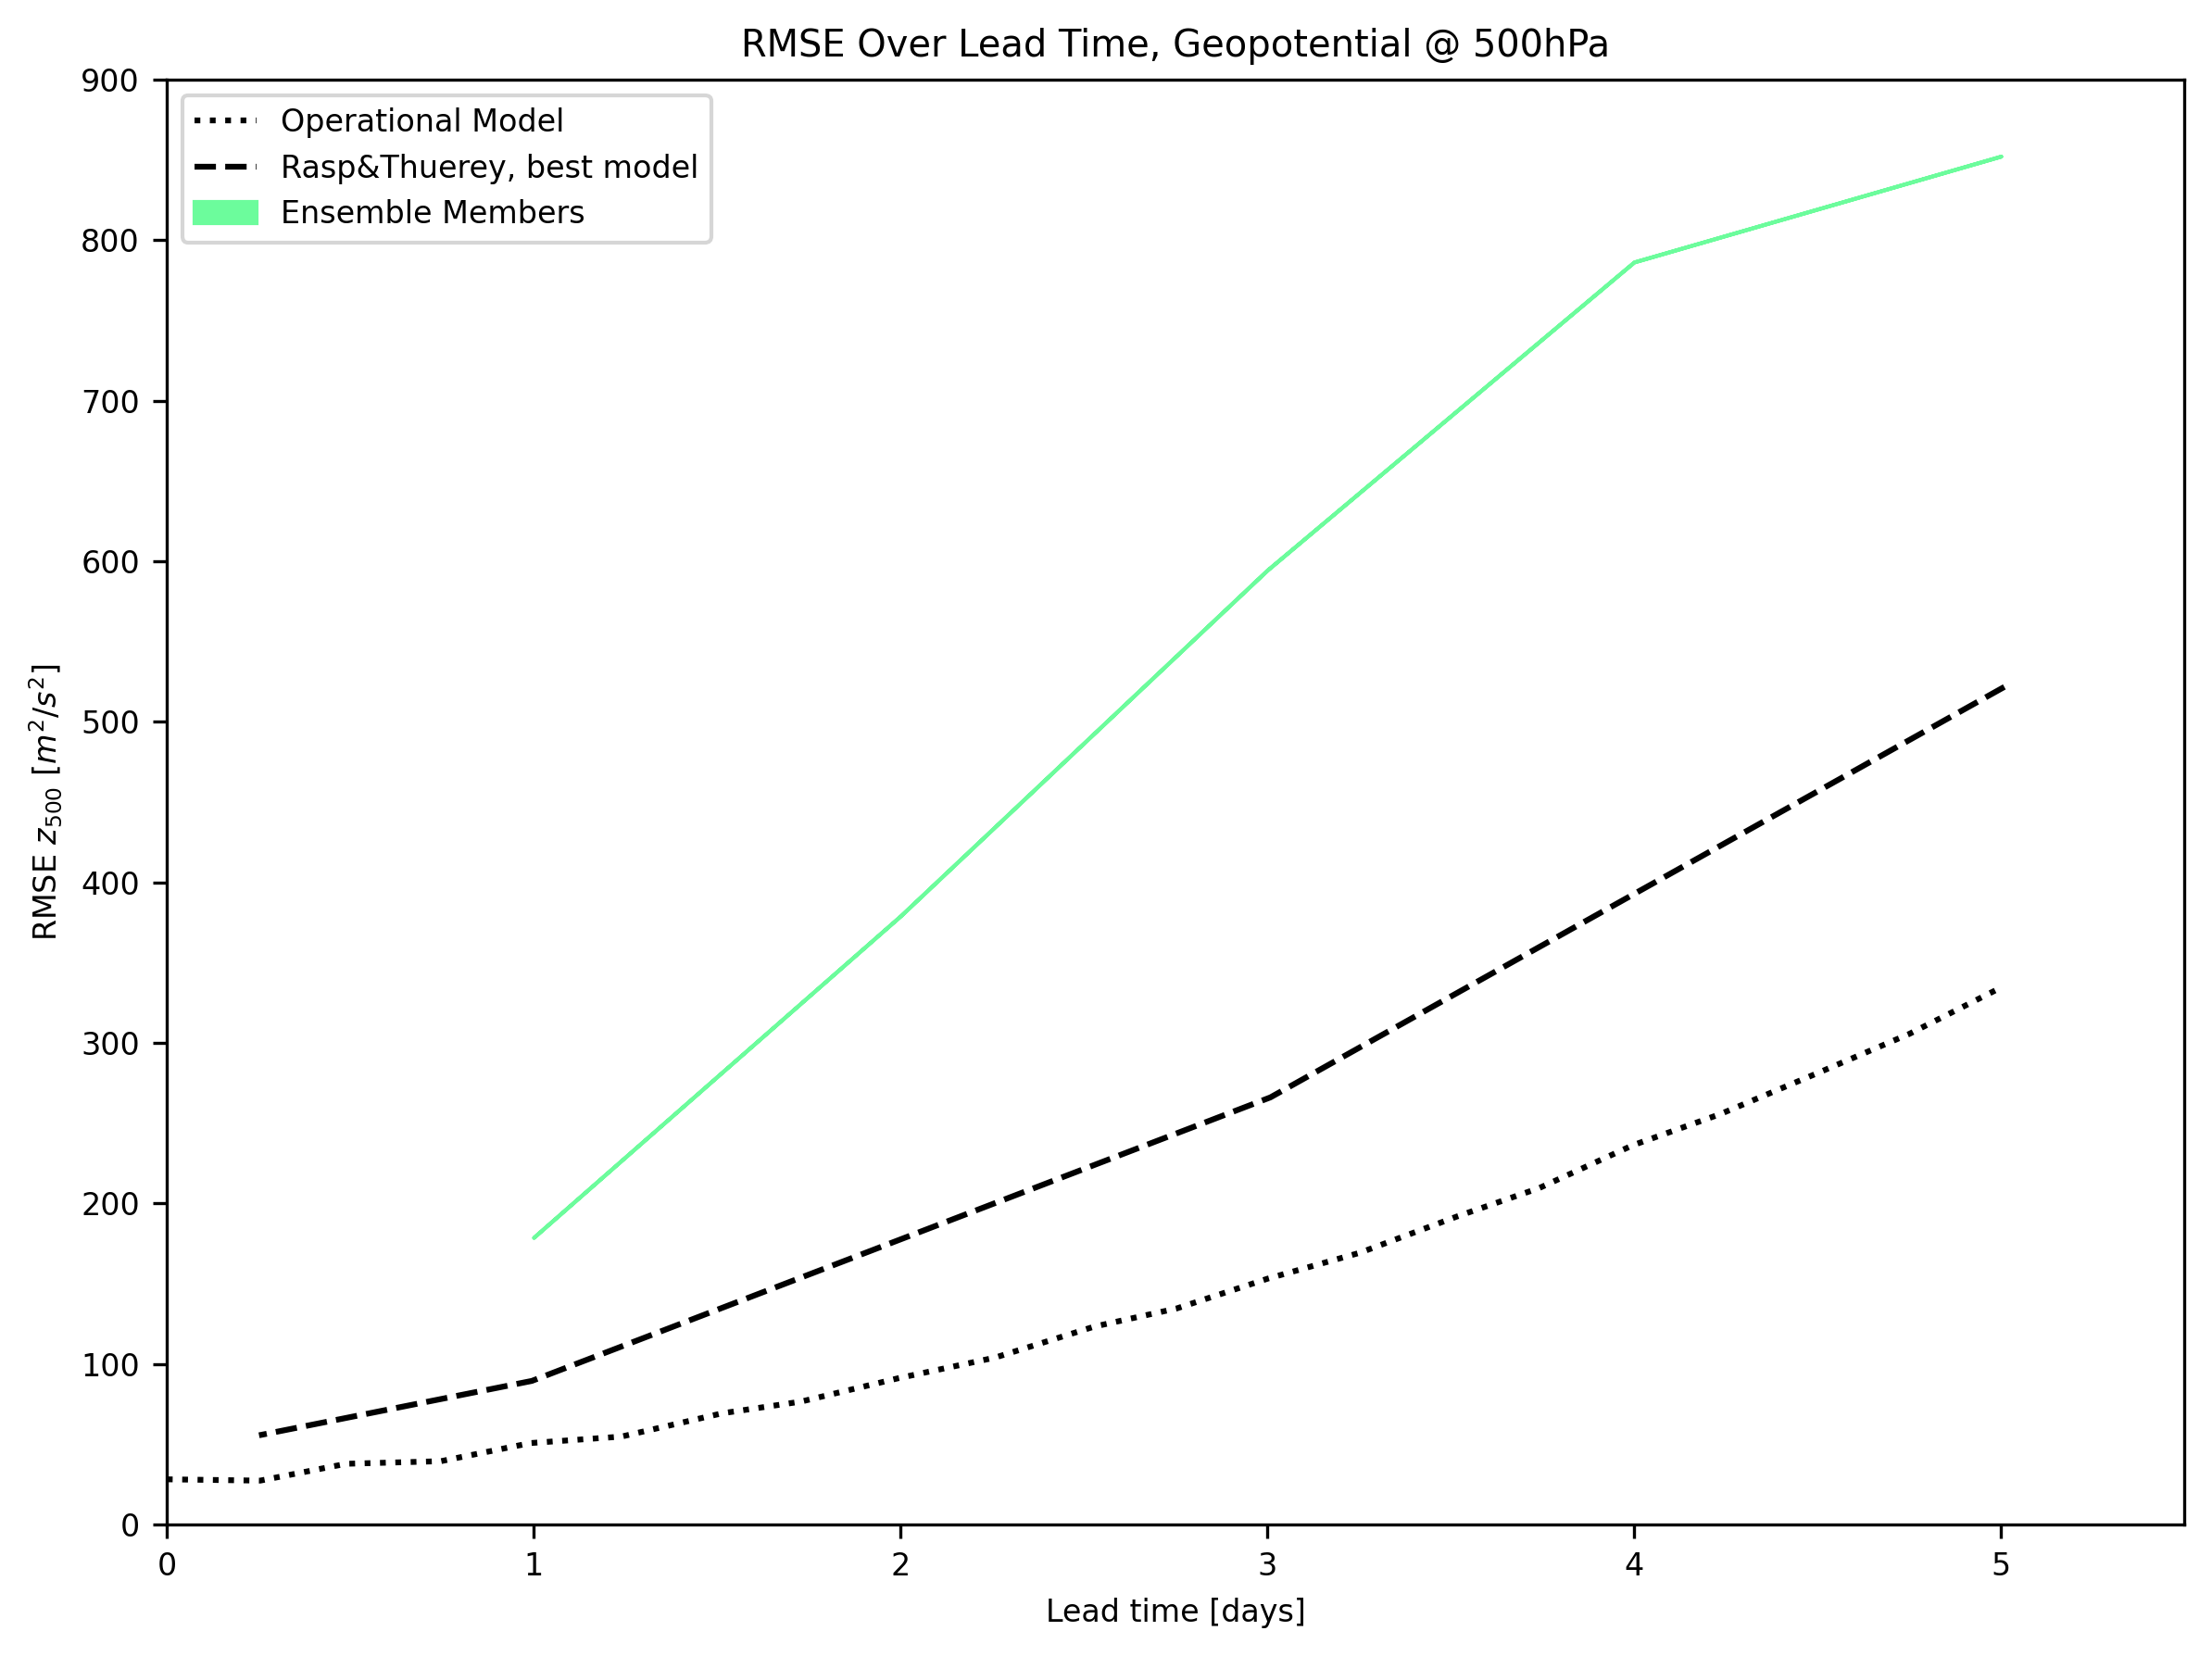

In [14]:
plt.figure(figsize=(8,6))
plt.plot(data_ifs_baseline[:,0], data_ifs_baseline[:,1], label="Operational Model", color="k", linestyle="dotted")
plt.plot(data_rasp_thuerey_best[:,0], data_rasp_thuerey_best[:,1], label="Rasp&Thuerey, best model", color="k", linestyle="dashed")
# plt.scatter(data_direct_cnn[:,0], data_direct_cnn[:,1], label="Direct CNN (Rasp 2020)", color="k",marker="+")

plt.fill_between(x=rmse_z_500[:,0,0], y1=np.amin(rmse_z_500[:,:,1], axis=1), y2=np.amax(rmse_z_500[:,:,1], axis=1), label="Ensemble Members", color="#6cfc9c")

# plt.plot(rmse_ensemble_mean_z_500[:,0], rmse_ensemble_mean_z_500[:,1], label="Ensemble Mean", color="#6cfc9c", linestyle="dashed")

plt.ylabel("RMSE $z_{500}$ $[m^2/s^2]$")
plt.xlabel("Lead time [days]")
plt.ylim(0,900)
plt.xlim(0,5.5)
plt.legend(loc="upper left")

plt.title("RMSE Over Lead Time, Geopotential @ 500hPa")
plt.tight_layout()
plt.savefig("images/performance_leadtime_version_3.jpg", dpi=450)

In [37]:
# t_850

# extracted from Rasp & Thuerey paper with https://automeris.io/WebPlotDigitizer/

data_ifs_baseline = np.array([[-0.015792798483891368, 0.7045406688489448],
                                [0.22109917877447893, 0.6973238385114566],
                                [0.4769425142135184, 0.7848326920500011],
                                [0.7359444093493368, 0.7890129979517222],
                                [0.9823120656980417, 0.8802953731886141],
                                [1.2413139608338597, 0.8996271942418499],
                                [1.4845230574857864, 1.0022684201458683],
                                [1.7245735944409348, 1.0139957694442847],
                                [1.9835754895767523, 1.1166609238308545],
                                [2.2394188250157923, 1.1359879591875806],
                                [2.492103600758054, 1.2348556633932501],
                                [2.7384712571067586, 1.2579562204483241],
                                [2.9785217940619075, 1.3568047818679534],
                                [3.2564750473783954, 1.4064683474032815],
                                [3.4838913455464304, 1.512873523612627],
                                [3.73973468098547, 1.5587157104845035],
                                [3.99557801642451, 1.6765275943260782],
                                [4.229311433986102, 1.7223362813223835],
                                [4.523057485786481, 1.8629328662493543],
                                [4.750473783954516, 1.9163077394283965],
                                [4.996841440303221, 2.0416810237561975]
                                ])

data_rasp_thuerey_best = np.array([[0.2368919772583702, 0.8109841306303713],
                                    [0.98547062539482, 0.9825728861578513],
                                    [2.9911560328490205, 1.6522784701085396],
                                    [5.003158559696778, 2.5303269587855817],
                                    ])


data_ifs_baseline = data_ifs_baseline.reshape(-1,2)
data_ifs_baseline[:,0] = data_ifs_baseline[:,0]

data_rasp_thuerey_best = data_rasp_thuerey_best.reshape(-1,2)
data_rasp_thuerey_best[:,0] = data_rasp_thuerey_best[:,0]


data_direct_cnn = np.array([[3,2.87], [5,3.37]])

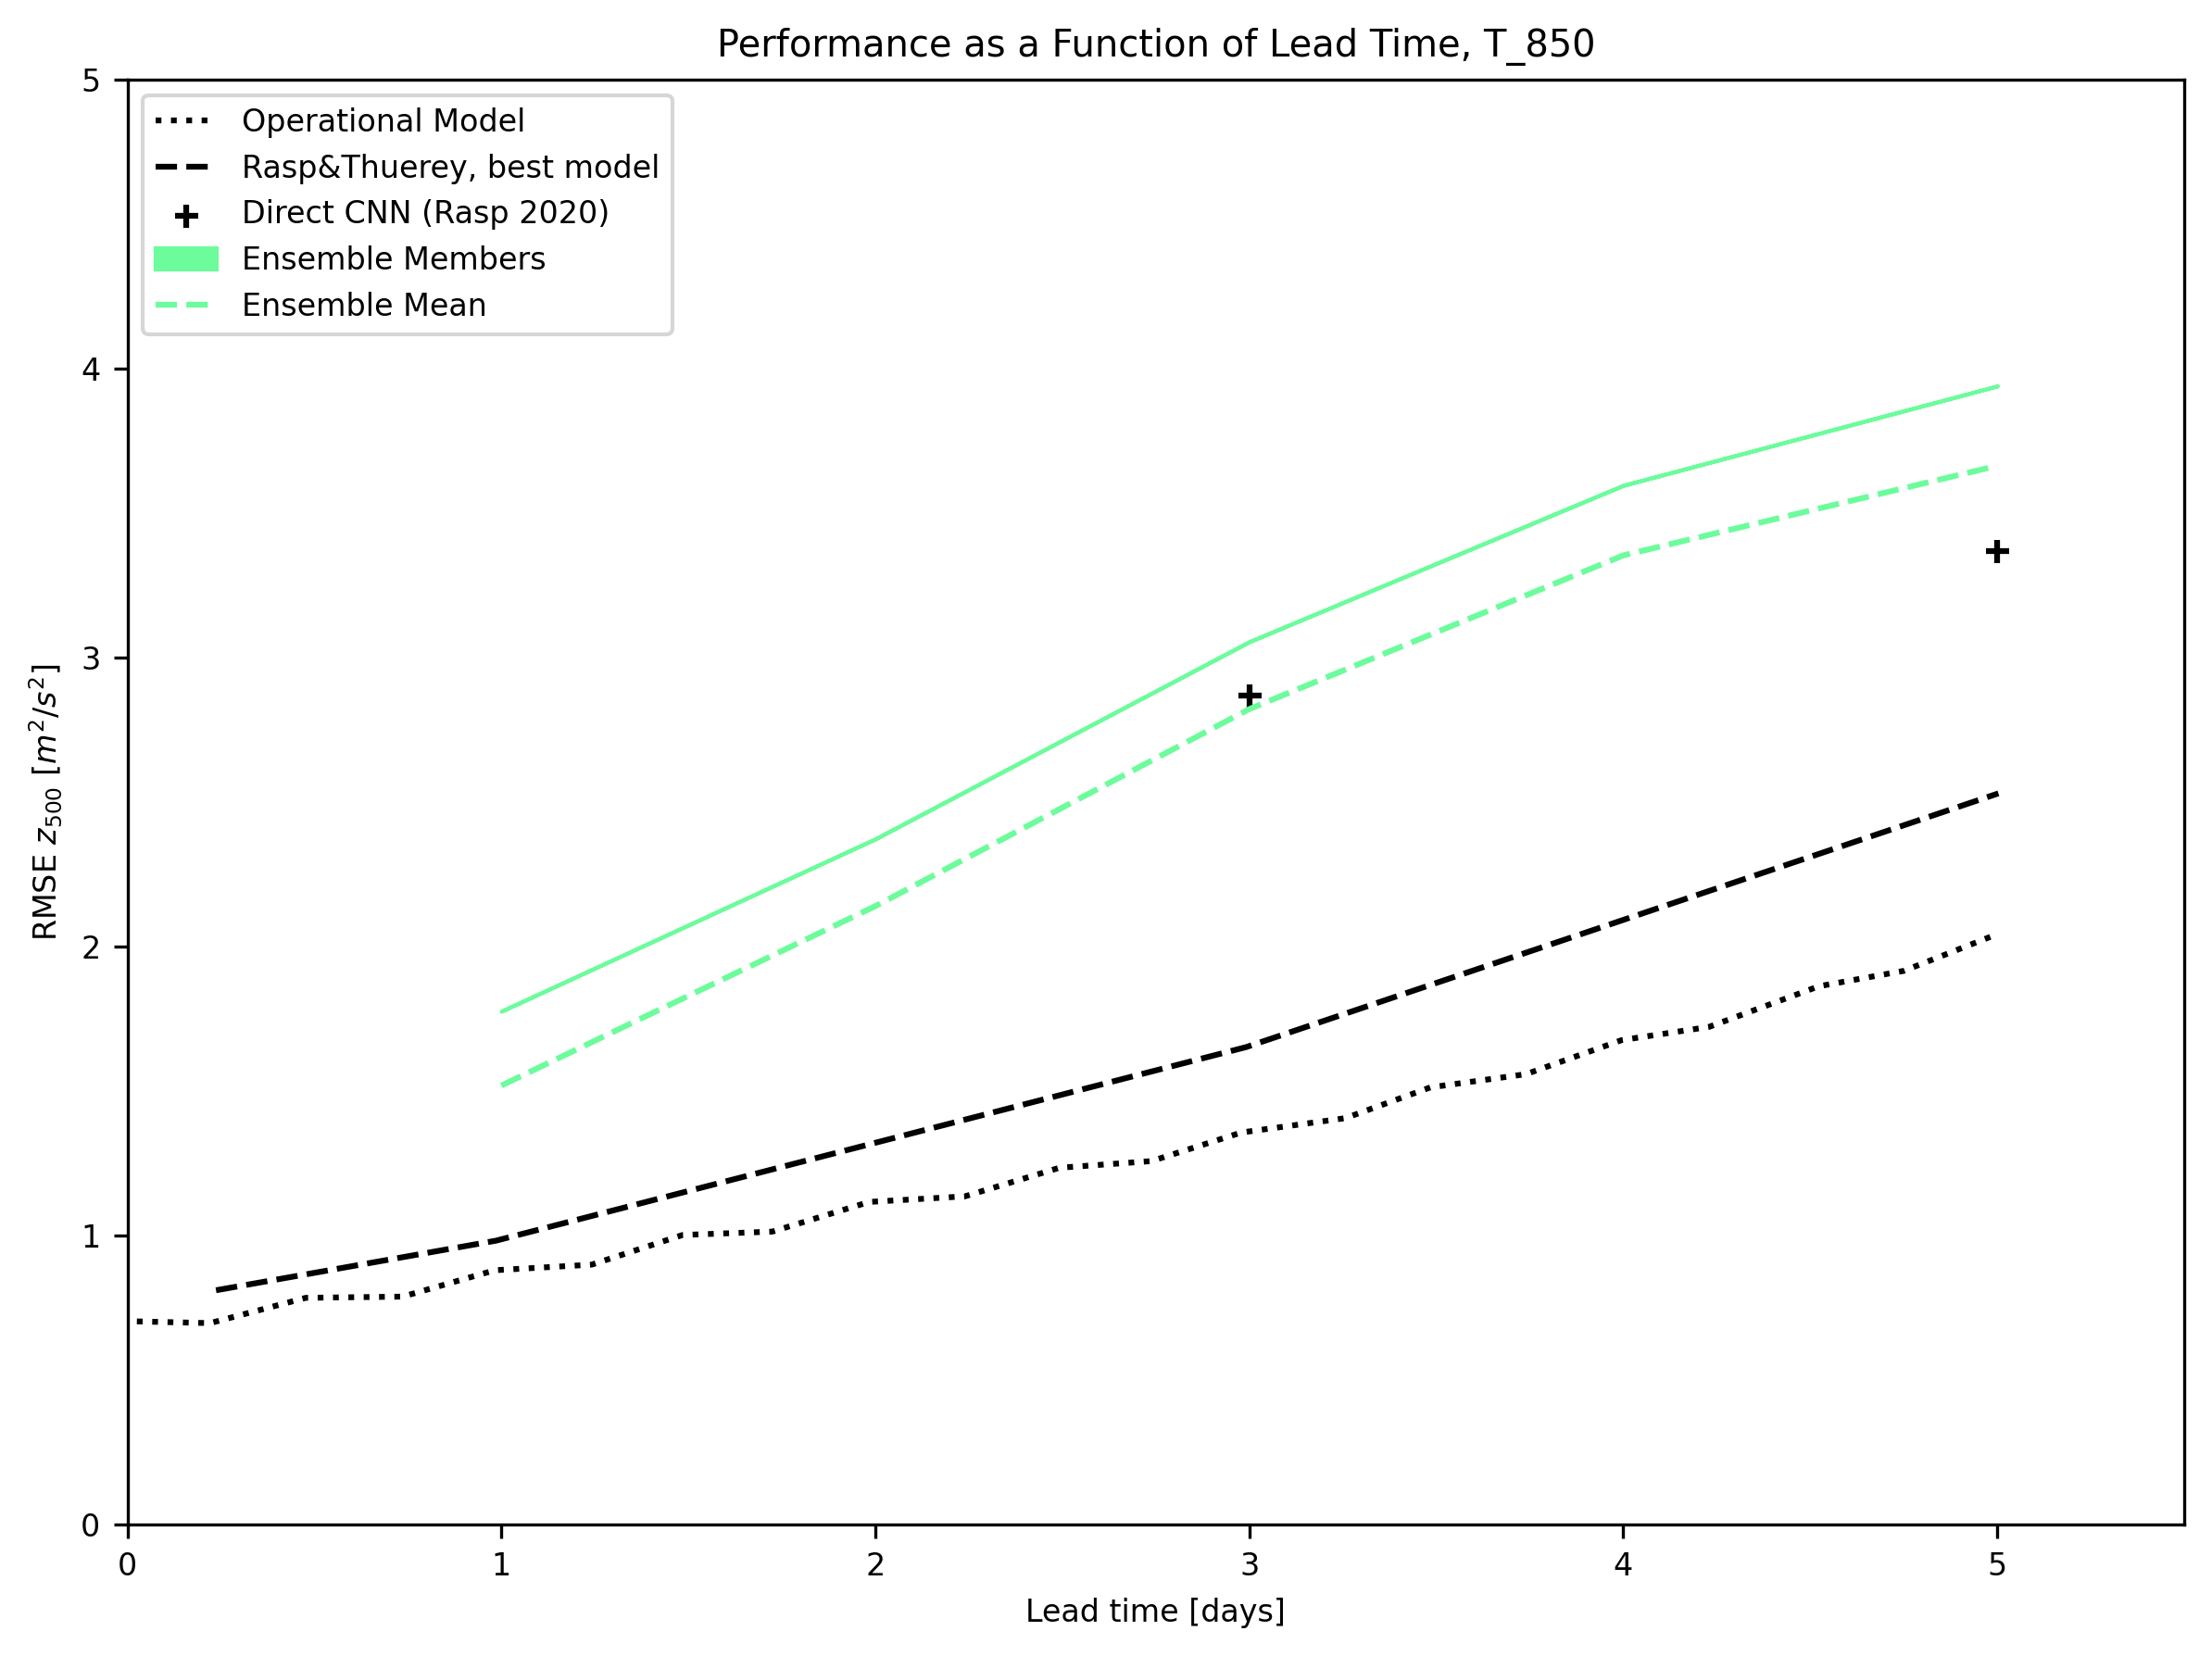

In [38]:
plt.figure(figsize=(8,6))
plt.plot(data_ifs_baseline[:,0], data_ifs_baseline[:,1], label="Operational Model", color="k", linestyle="dotted")

plt.plot(data_rasp_thuerey_best[:,0], data_rasp_thuerey_best[:,1], label="Rasp&Thuerey, best model", color="k", linestyle="dashed")

plt.scatter(data_direct_cnn[:,0], data_direct_cnn[:,1], label="Direct CNN (Rasp 2020)", color="k",marker="+")

plt.fill_between(x=rmse_t_850[:,0,0], y1=np.amin(rmse_t_850[:,:,1], axis=1), y2=np.amax(rmse_t_850[:,:,1], axis=1), label="Ensemble Members", color="#6cfc9c")

plt.plot(rmse_ensemble_mean_t_850[:,0], rmse_ensemble_mean_t_850[:,1], label="Ensemble Mean", color="#6cfc9c", linestyle="dashed")

plt.ylabel("RMSE $T_{850}$ $[k]$")
plt.xlabel("Lead time [days]")
plt.ylim(0,5)
plt.xlim(0,5.5)
plt.legend(loc="upper left")

plt.title("Performance as a Function of Lead Time, T_850")
plt.tight_layout()
# plt.savefig("/home/wider/Projects/diffusion-models-for-weather-prediction/images/performance_leadtime_version_0.jpg", dpi=450)